# Please note I am an undergrad!


## Notes to self:
#### The two convolution layers are 32 filters 12x12x3 and 64 filters 5x5x32, but how do you put in the depth?




# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment1 using this file format:</u> <b>Yourfirstname_lastname_Assignment5.ipynb</b> 

#### <b>Deadline</b>: <u>Sunday, Dec-02-2018 11:59 PM.</u>

## Assignment 5 (This assignment is for Graduate students only, it is optional for undergraduates with extra credits )

 

In this assignemnt you are going to train a convolutional neural network on CIFAR-10  dataset from assignment 4, refer to part1 in assignemnt 4 to use same training, validation and testing datasets splits. 

Start by reading the this tutorial on the tensorflow website (https://www.tensorflow.org/tutorials/keras/basic_classification). 


a. [70 points] Define the model as indicated in the code below. The model is defined as follows:

- An input that is 32x32x3 dimensional vector.
- Reshape the input as 32x32x3 images (it is a dataset with color images)
- A convolutional layer with 32 filters of shape 12x12x3 and a ReLU non-linearity (with stride (2, 2) and no padding)
- A convolutional layer with 64 filters of shape 5x5x32 and a ReLU non-linearity (with stride (1, 2) and padding to maintain size)
- A max_pooling layer of shape 2x2
- A fully connected layer taking all the outputs of the max_pooling layer to 1024 units and ReLU nonlinearity
- A fully connected layer taking 1024 units to 10 no activation function (the softmax non-linearity will be included in the loss function rather than in the model) 
- Use AdamOptimizer 
- use the Accuracy as your metric... Accuray is simply defined as the fraction of data correctly classified
- initially pick the learning rate to be 0.05 (if this learning rate does not work, pick different learning rate) with decay step of 0.95 every 2000 iterations


write the code to train the model written, train for 15 epochs with a  batch size of 128. 




Hint: start from known architecture then modify the code to match the numbers listed above.

In [2]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten, Conv3D, Conv2D, MaxPooling2D
from keras import optimizers

Using TensorFlow backend.


In [3]:
(xtrain2, ytrain2), (xtest2, ytest2) = cifar10.load_data()

In [4]:
xtrain = xtrain2
ytrain = ytrain2
xtest = xtest2
ytest = ytest2

In [5]:
xval = xtrain[40000:]
xtrain = xtrain[:40000]
yval = ytrain[40000:]
ytrain = ytrain[:40000]

In [6]:
def load_cifar10(xtrain, xval, xtest, ytrain, yval, ytest):
    ''' '''    
    
    global ytrain_1hot
    global ytest_1hot
    global yval_1hot
    
    xtrain = xtrain.astype('float32')
    xval = xval.astype('float32')
    xtest = xtest.astype('float32')
    
    #Normalizing
    xtrain = xtrain/255
    xval = xval/255
    xtest = xtest/255
    
    values = ytrain
    n_values = np.max(values) + 1
    ytrain_1hot = np.eye(n_values)[values]
    
    values = yval
    n_values = np.max(values) + 1
    yval_1hot = np.eye(n_values)[values]
    
    values = ytest
    n_values = np.max(values) + 1
    ytest_1hot = np.eye(n_values)[values]
    
    
    return xtrain, xval, xtest, ytrain_1hot, yval_1hot, ytest_1hot

In [7]:
#load_cifar10(xtrain, xval, xtest, ytrain, yval, ytest)
xtrain, xval, xtest, ytrain_1hot, yval_1hot, ytest_1hot = load_cifar10(xtrain, xval, xtest, ytrain, yval, ytest)
 


In [39]:
ytrain_1hot = np.squeeze(ytrain_1hot)
yval_1hot = np.squeeze(yval_1hot)
ytest_1hot = np.squeeze(ytest_1hot)

In [40]:
model = Sequential()

In [41]:
xtrain.shape

(40000, 32, 32, 3)

In [42]:
model.add(Conv2D(32,(12,12),input_shape = xtrain.shape[1:],strides = (2,2),padding = 'valid'))

In [43]:
model.add(Activation('relu'))

In [44]:
model.add(Conv2D(64,(5,5),strides = (1,2),padding = 'same'))

In [45]:
model.add(Activation("relu"))

In [46]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [47]:
model.add(Flatten())

In [48]:
model.add(Dense(1024))

In [49]:
model.add(Activation('relu'))

In [50]:
model.add(Dense(10, activation='softmax'))

In [51]:
#ADAM Optimizer
#Adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

 
model.compile(optimizer = optimizers.Adam(lr=.001, decay=.000475),loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(xtrain, ytrain_1hot, epochs = 15, batch_size = 128, validation_data = (xval,yval_1hot))

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 17s 421us/step - loss: 1.6865 - acc: 0.3887 - val_loss: 1.5174 - val_acc: 0.4628
Epoch 2/15
40000/40000 [==============================] - 16s 412us/step - loss: 1.3901 - acc: 0.5009 - val_loss: 1.3661 - val_acc: 0.5091
Epoch 3/15
40000/40000 [==============================] - 16s 412us/step - loss: 1.2614 - acc: 0.5515 - val_loss: 1.2992 - val_acc: 0.5386
Epoch 4/15
40000/40000 [==============================] - 17s 425us/step - loss: 1.1519 - acc: 0.5931 - val_loss: 1.2190 - val_acc: 0.5661
Epoch 5/15
40000/40000 [==============================] - 17s 416us/step - loss: 1.0537 - acc: 0.6290 - val_loss: 1.1803 - val_acc: 0.5862
Epoch 6/15
40000/40000 [==============================] - 17s 430us/step - loss: 0.9540 - acc: 0.6663 - val_loss: 1.1544 - val_acc: 0.5967
Epoch 7/15
40000/40000 [==============================] - 17s 430us/step - loss: 0.8579 - acc: 0.6999 - val_loss: 1.

b. [15 points] Find better convolutional neural network architecture that give better results (at least enhancment of 5.0%) than the one built in part a (prove experimentally). 

## The 15th epoch with the given architecture had a validation accuracy of 60.23%, while the following architecture has a validation accuracy of 67.20%.

#### You can increase the accuracy with a few methods, including decreasing filter size, decreasing stride size, potentially by adding padding to the convolutional layers, and potentially by adding more fully connected layers.

In [52]:
better_model = Sequential()

better_model.add(Conv2D(32,(5,5),input_shape = xtrain.shape[1:],strides = (2,2),padding = 'same'))

better_model.add(Activation('relu'))

better_model.add(Conv2D(64,(3,3),strides = (2,2),padding = 'same'))

better_model.add(Activation('relu'))

better_model.add(MaxPooling2D(pool_size = (2,2)))

better_model.add(Flatten())

better_model.add(Dense(1024))

better_model.add(Activation('relu'))

better_model.add(Dense(10, activation='softmax'))



In [53]:
#ADAM Optimizer

better_model.compile(optimizers.Adam(lr=.001, decay=.000475),loss = 'categorical_crossentropy', metrics = ['accuracy'])
better_model.fit(xtrain, ytrain_1hot, epochs = 15, batch_size = 128, validation_data = (xval,yval_1hot))

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 13s 314us/step - loss: 1.5910 - acc: 0.4302 - val_loss: 1.3851 - val_acc: 0.5071
Epoch 2/15
40000/40000 [==============================] - 12s 293us/step - loss: 1.2442 - acc: 0.5594 - val_loss: 1.2163 - val_acc: 0.5714
Epoch 3/15
40000/40000 [==============================] - 12s 306us/step - loss: 1.1096 - acc: 0.6093 - val_loss: 1.1274 - val_acc: 0.5989
Epoch 4/15
40000/40000 [==============================] - 11s 285us/step - loss: 1.0074 - acc: 0.6458 - val_loss: 1.0807 - val_acc: 0.6211
Epoch 5/15
40000/40000 [==============================] - 11s 271us/step - loss: 0.9184 - acc: 0.6793 - val_loss: 1.0448 - val_acc: 0.6339
Epoch 6/15
40000/40000 [==============================] - 12s 294us/step - loss: 0.8415 - acc: 0.7067 - val_loss: 1.0013 - val_acc: 0.6544
Epoch 7/15
40000/40000 [==============================] - 12s 307us/step - loss: 0.7697 - acc: 0.7318 - val_loss: 0.

In [54]:
xtrain.shape

(40000, 32, 32, 3)

c. [15 points] Visualize all the 32 filters in the first convolution layer. Each of shape 12x12x3, they should be viewed as color  images. 

In [55]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,32,32,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='rainbow')
            activation_index += 1

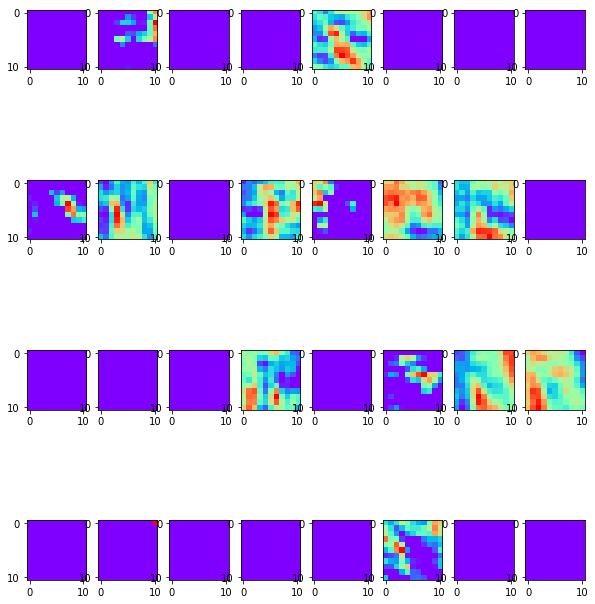

In [56]:
display_activation(activations, 8, 4, 1)